In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
visa = pd.read_csv('excel/visaF.csv', index_col=['date'], parse_dates=['date'])
mcard = pd.read_csv('excel/mcardF.csv', index_col=['date'], parse_dates=['date'])
rate = pd.read_csv('excel/rateF.csv', index_col=['Date'], parse_dates=['Date'])

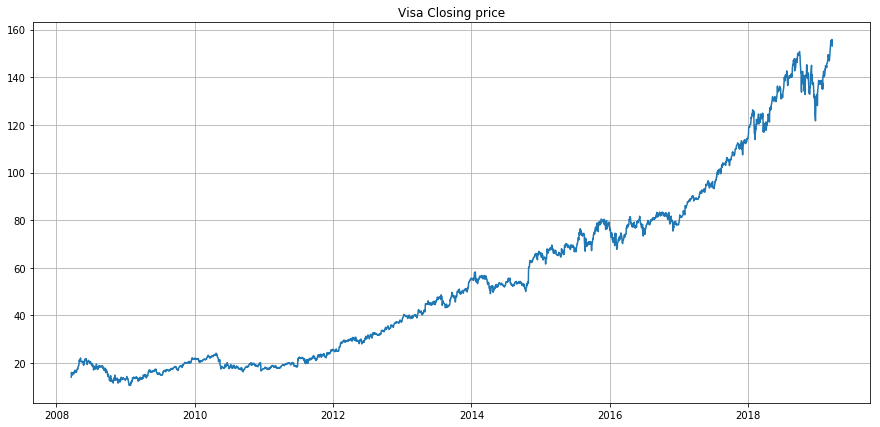

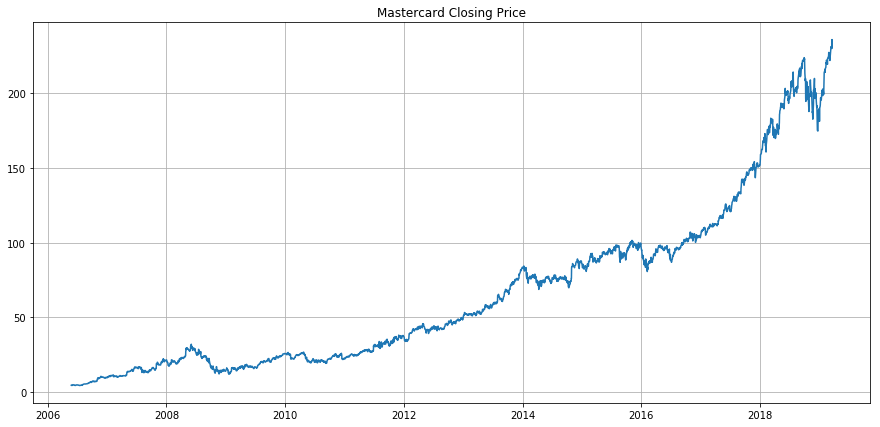

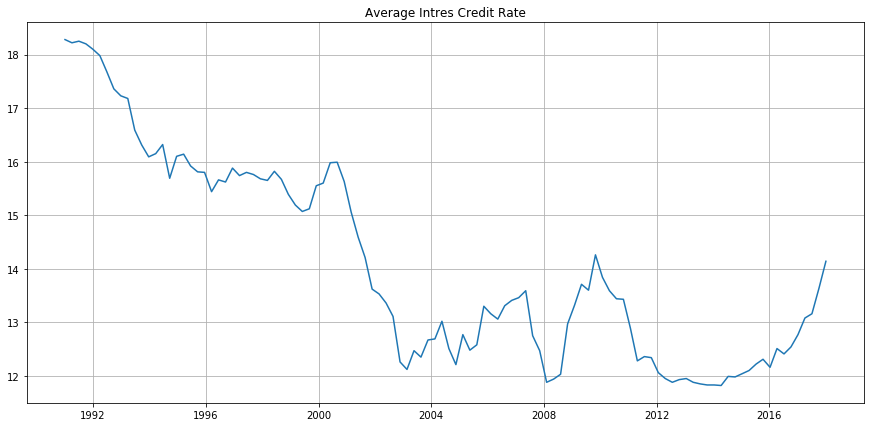

In [3]:
plt.figure(figsize=(15, 7)) 
plt.plot(visa.close)
plt.title('Visa Closing price')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(mcard.close)
plt.title('Mastercard Closing Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(rate['Overall Avg. Int.Rate'])
plt.title('Average Intres Credit Rate')
plt.grid(True)
plt.show()

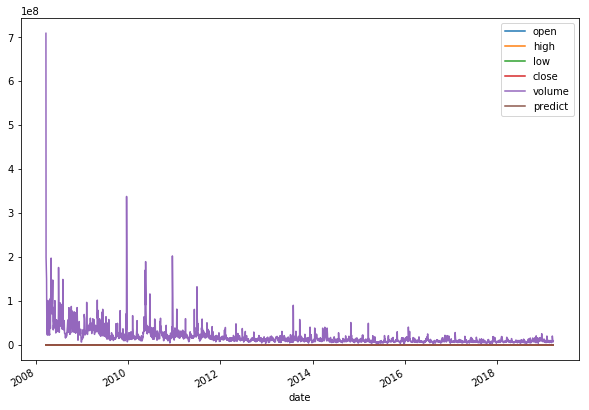

In [4]:
#holt model
fit = Holt(visa['close']).fit()
visa['predict'] = fit.fittedvalues
visa.plot(figsize=(10,7))

0.9238230375396081

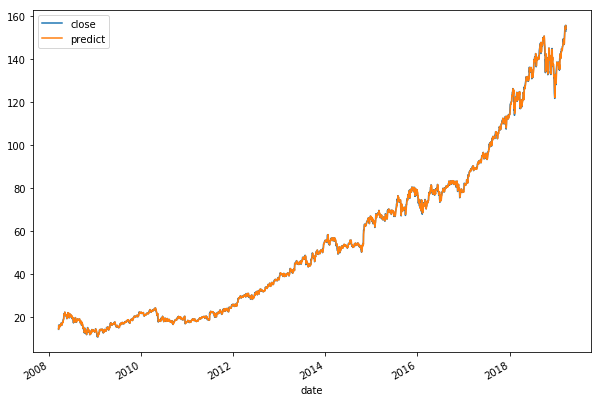

In [5]:
visaP = visa[['close', 'predict']]
visaP.plot(figsize=(10,7))
sqrt(mean_squared_error(visa['close'], visa['predict']))

0.30938772663005365
0.2275791259793753


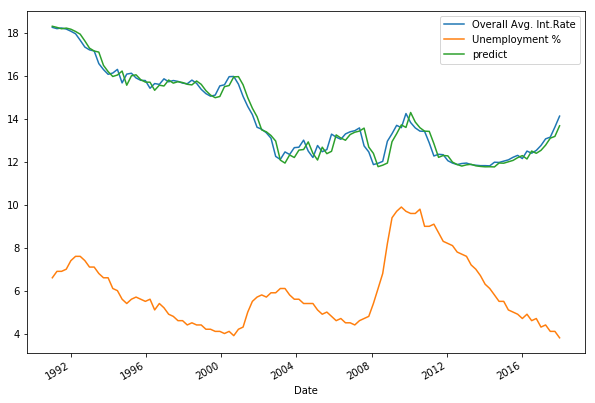

In [6]:
fit2 = Holt(rate['Overall Avg. Int.Rate']).fit()
rate['predict'] = fit2.fittedvalues
rate.plot(figsize=(10,7))
print(sqrt(mean_squared_error(rate['Overall Avg. Int.Rate'], rate['predict'])))
print(mean_absolute_error(rate['Overall Avg. Int.Rate'], rate['predict']))

In [7]:
#index = pd.date_range(start='1/2/1991', periods=110, freq='Q')
rate = pd.DataFrame(rate['Overall Avg. Int.Rate'], index=index)

NameError: name 'index' is not defined

In [ ]:
index=pd.date_range('2017-01-02', periods=110, freq='Q')
rateP=pd.DataFrame(fit2.forecast(10), index=index)
rateP.columns=['predict']
rate['Overall Avg. Int.Rate'].plot()
rateP['predict'].plot()

In [ ]:
fit2.params

In [ ]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(visa['close']).plot()

In [ ]:
from pandas.plotting import autocorrelation_plot 
autocorrelation_plot(visa['close'])